<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-11 15:50:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  62.7MB/s    in 3.3s    

2025-07-11 15:50:14 (61.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [9]:
# Query CompTotal from the database
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

In [10]:
# Convert CompTotal to numeric (if it’s stored as string)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop missing or invalid values
df = df.dropna(subset=['CompTotal'])

# Optional: Filter extreme outliers (e.g., above 500,000)
df = df[df['CompTotal'] <= 500000]

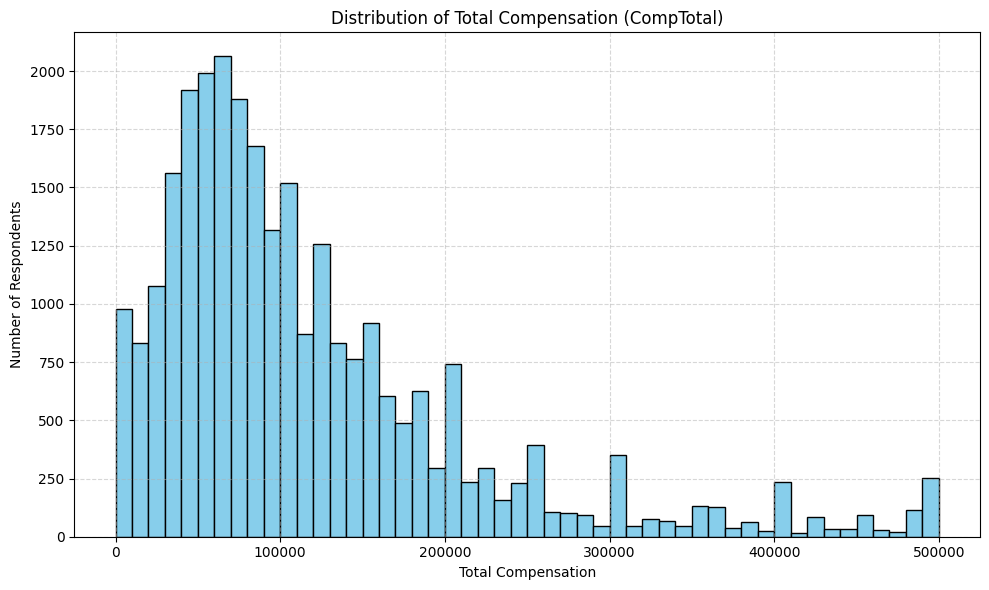

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [12]:
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

In [13]:
# Clean and map special string values to numeric
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})

# Convert remaining values to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop any invalid or NaN entries
df = df.dropna(subset=['YearsCodePro'])


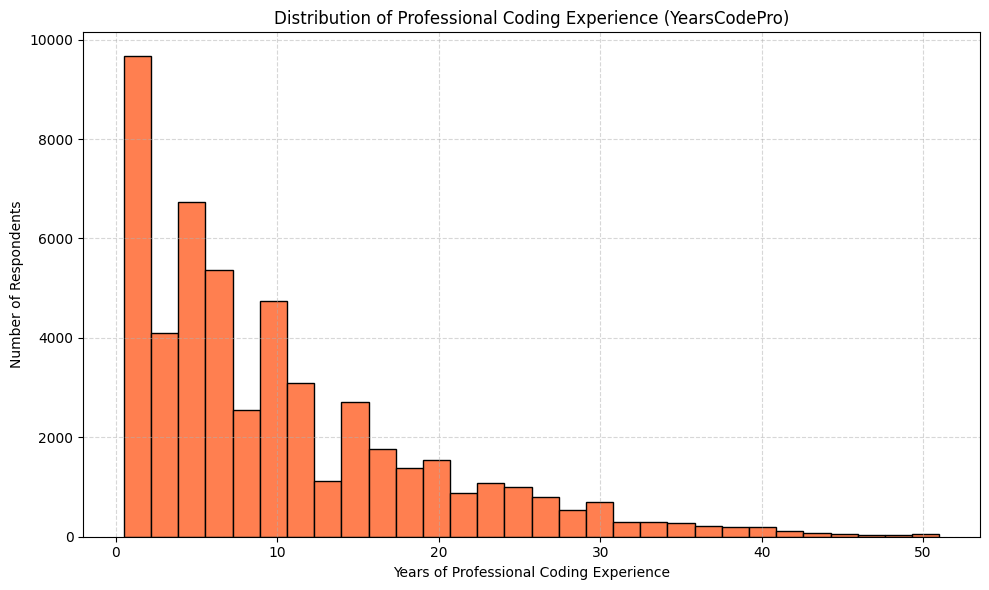

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [15]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)


In [16]:
# Convert CompTotal to numeric
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop any rows with invalid or missing CompTotal
df.dropna(subset=['CompTotal'], inplace=True)

In [18]:
df['AgeGroup'] = df['Age'].str.extract(r'(\d{2}-\d{2})')  # e.g., '25-34'
df['AgeGroup'].fillna(df['Age'])  # Retain groups like 'Under 16' or '65 years or older'

0        18-24
1        25-34
2        35-44
3        35-44
4        25-34
         ...  
33735    18-24
33736    25-34
33737    25-34
33738    35-44
33739    45-54
Name: AgeGroup, Length: 33740, dtype: object

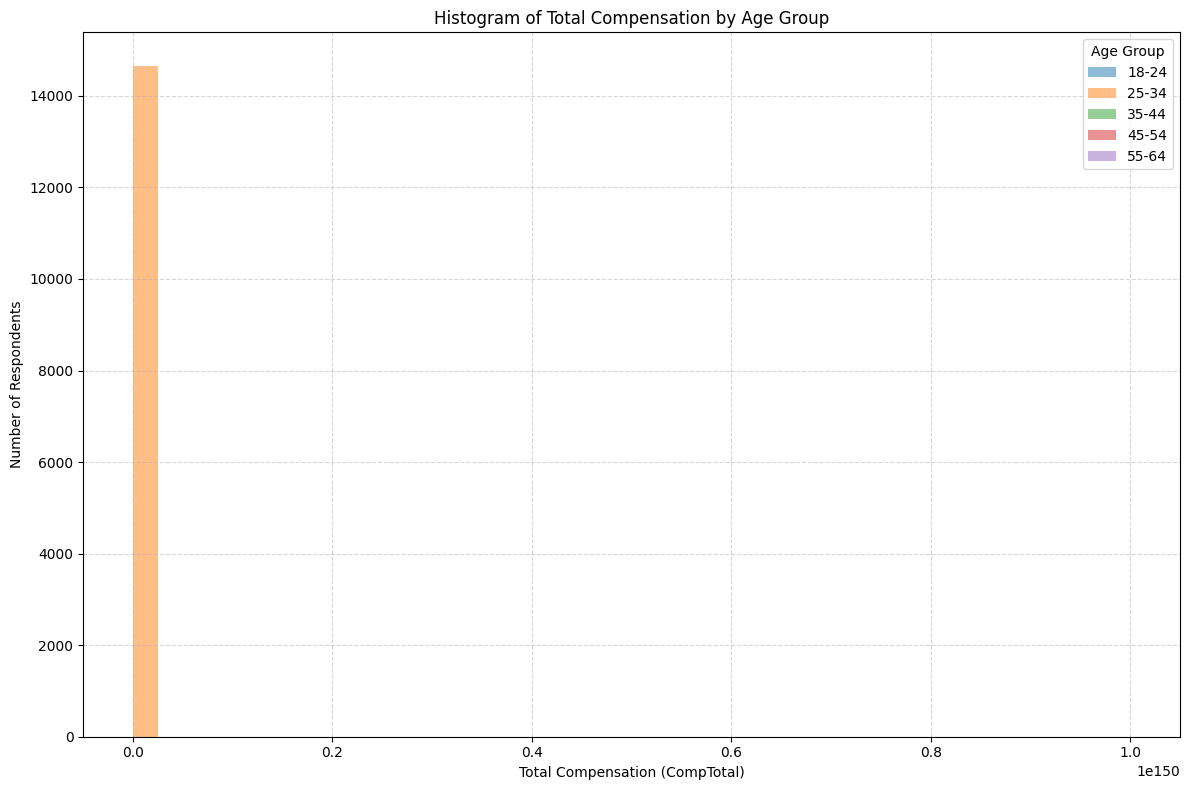

In [19]:
age_groups = df['AgeGroup'].dropna().unique()
age_groups.sort()

plt.figure(figsize=(12, 8))

for age in age_groups:
    subset = df[df['AgeGroup'] == age]
    plt.hist(subset['CompTotal'], bins=40, alpha=0.5, label=age)

plt.title('Histogram of Total Compensation by Age Group')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [20]:
QUERY = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

In [25]:
# Extract age range (e.g. '30-34') from '30-34 years old'
df['AgeGroup'] = df['Age'].str.extract(r'(\d{2}-\d{2})')

# Map TimeSearching text to approximate numeric values in minutes
time_mapping = {
    'Less than 30 minutes a day': 15,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}

df['TimeSearchingMinutes'] = df['TimeSearching'].map(time_mapping)

# Drop rows where mapping failed
df = df.dropna(subset=['AgeGroup', 'TimeSearchingMinutes'])

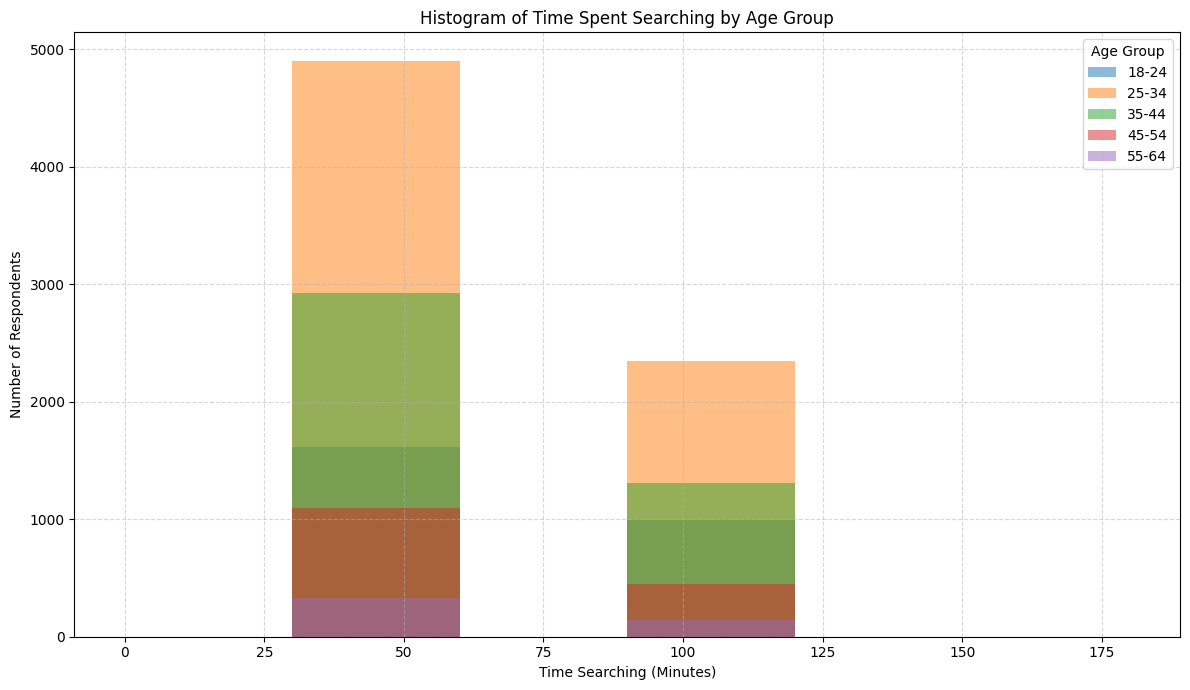

In [26]:
plt.figure(figsize=(12, 7))

for age in sorted(df['AgeGroup'].unique()):
    subset = df[df['AgeGroup'] == age]
    plt.hist(subset['TimeSearchingMinutes'], bins=[0,30,60,90,120,180],
             alpha=0.5, label=age)

plt.title('Histogram of Time Spent Searching by Age Group')
plt.xlabel('Time Searching (Minutes)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [27]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

In [28]:
df_expanded = df['DatabaseWantToWorkWith'].str.split(';|,').explode().str.strip()

In [29]:
# Count occurrences
top_counts = df_expanded.value_counts().head(5)

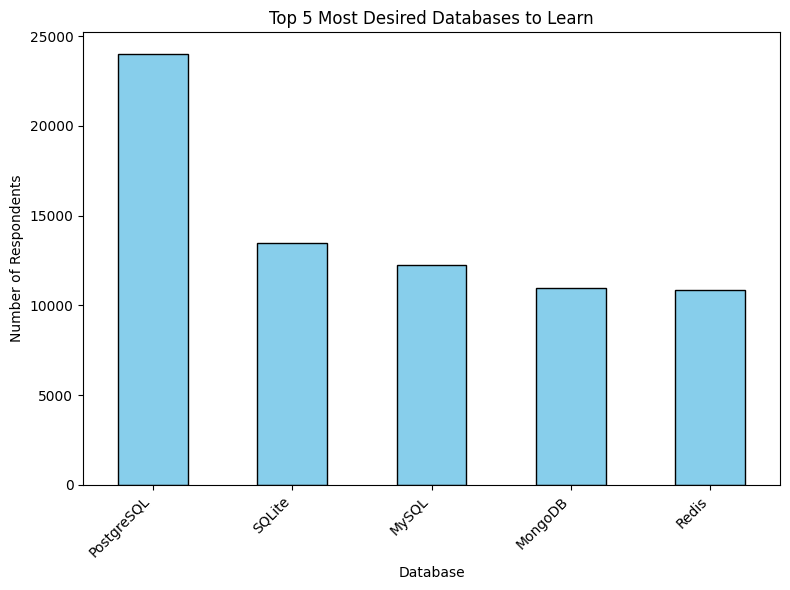

In [30]:
# Plot bar chart (histogram-like)
plt.figure(figsize=(8, 6))
top_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [31]:
# Query the RemoteWork data
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

In [32]:
# Count frequencies of each preferred work location
work_location_counts = df['RemoteWork'].value_counts()

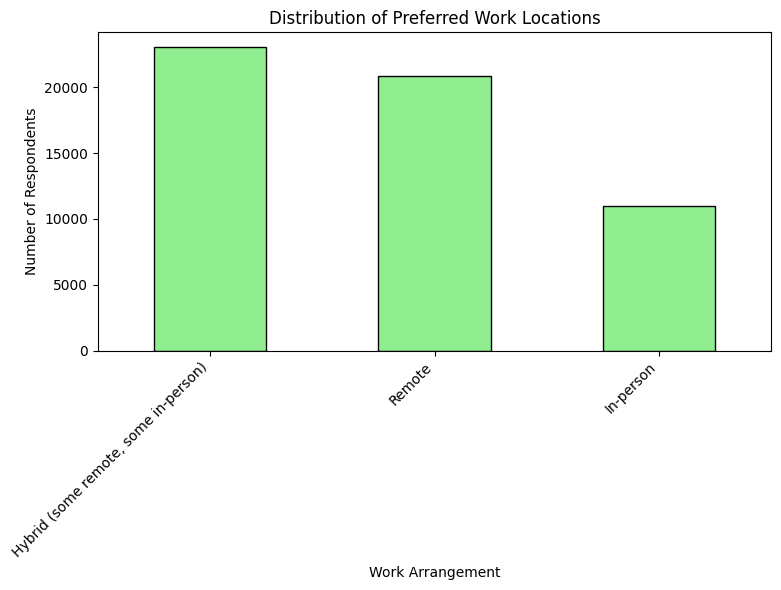

In [33]:
# Plot histogram (bar chart)
plt.figure(figsize=(8, 6))
work_location_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Preferred Work Locations')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [34]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
  AND Age IN ('45-54 years old', '55-60 years old')
"""

# Read query results into DataFrame
df = pd.read_sql_query(QUERY, conn)


In [35]:
# Convert CompTotal to numeric (in case of strings or nulls)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with NaN after conversion
df = df.dropna(subset=['CompTotal'])

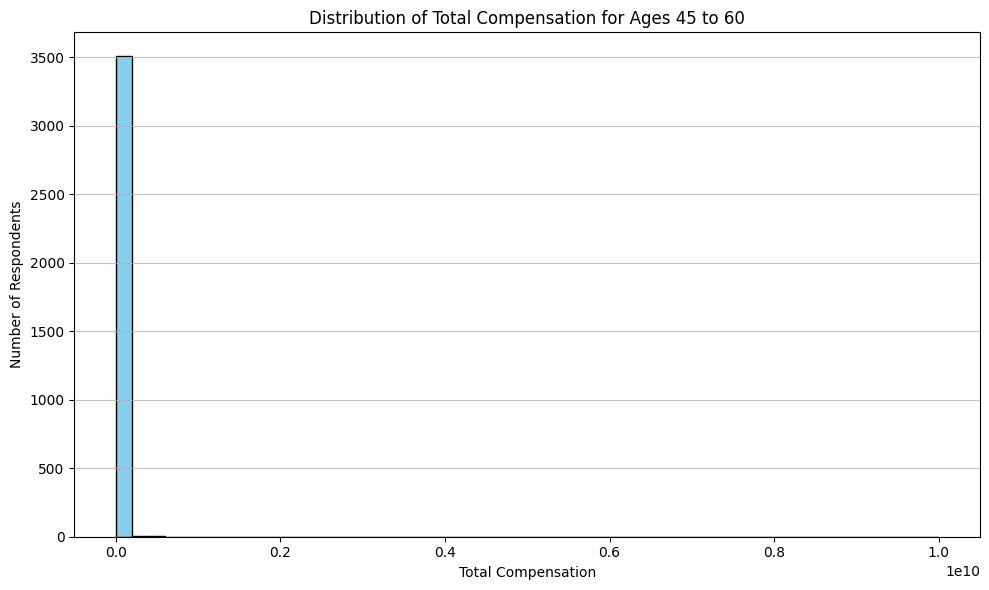

In [36]:
# Plot histogram of CompTotal
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation for Ages 45 to 60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [37]:
# Query to get data
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE JobSat IS NOT NULL
  AND YearsCodePro IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

In [38]:
# Convert JobSat to numeric (in case it is string)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Clean up YearsCodePro by trimming spaces
df['YearsCodePro'] = df['YearsCodePro'].str.strip()

In [39]:
experience_groups = {
    'Less than 1 year': ['Less than 1 year'],
    '1-3 years': ['1-2 years', '3-5 years'],
    '6-9 years': ['6-8 years', '9-11 years'],
    '10+ years': ['10-12 years', '13-15 years', '16-18 years', '19-21 years', '22 or more years']
}
# Create a new column to hold grouped experience
def map_experience(x):
    for key, values in experience_groups.items():
        if x in values:
            return key
    return 'Other'

df['ExperienceGroup'] = df['YearsCodePro'].apply(map_experience)

# Filter out 'Other' if any
df = df[df['ExperienceGroup'] != 'Other']

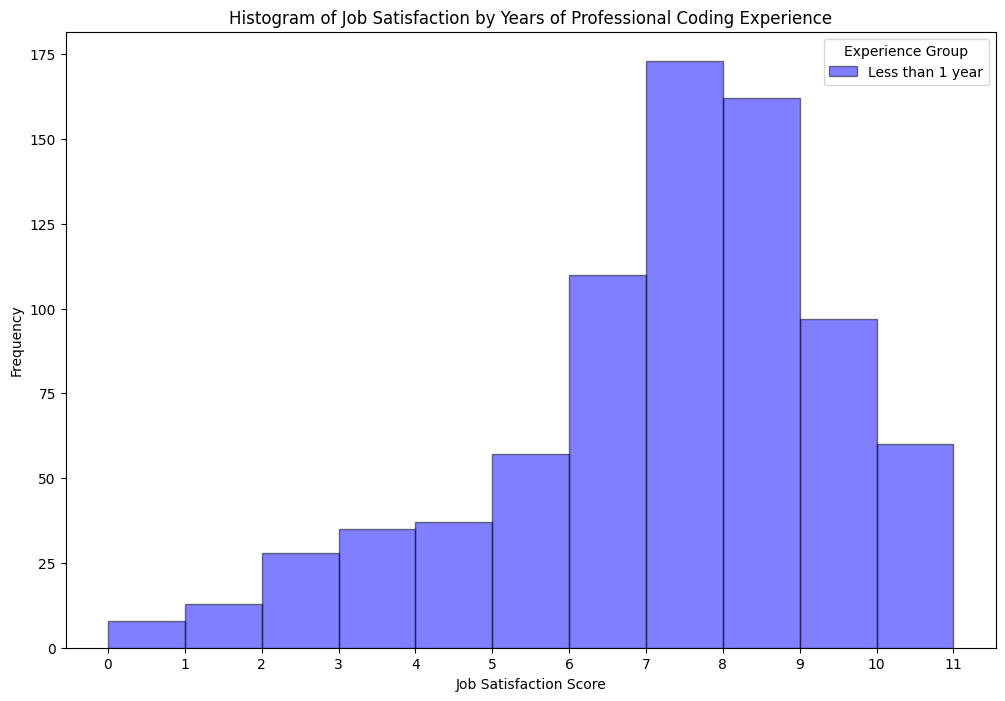

In [41]:
plt.figure(figsize=(12, 8))

bins = range(0, 12)  # Assuming JobSat scale is roughly 1-10

colors = ['blue', 'orange', 'green', 'red']
for color, (group, group_df) in zip(colors, df.groupby('ExperienceGroup')):
    plt.hist(group_df['JobSat'].dropna(), bins=bins, alpha=0.5, label=group, color=color, edgecolor='black')

plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Frequency')
plt.legend(title='Experience Group')
plt.xticks(bins)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [42]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
